In [20]:
import numpy as np
import pandas as pd

In [18]:
class MeraLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        

#sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

#gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)


            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

#predict
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)
        

# Accuracy 
    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MeraLogisticRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {model.accuracy(y_test, y_pred):.2%}")

Accuracy: 85.67%


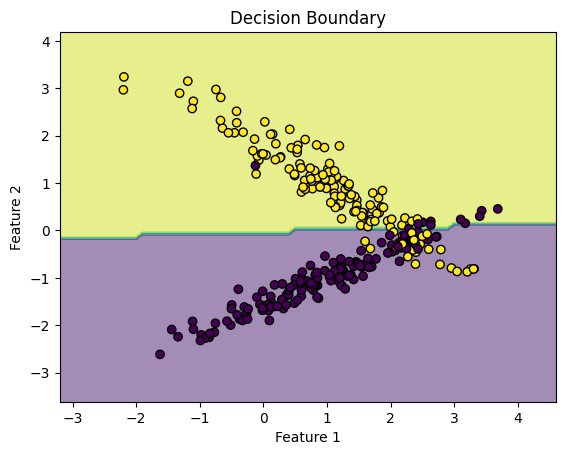